In [1]:
%matplotlib inline
import sys
import numpy as np
sys.path.append('../src/')
import measurement_builder as bldr
import viz

# building the signal, noise, and measurement matrix

In [2]:
### DIMENSIONS ###
p=200 # number of variables, or features
n=400 # number of measures, or samples

### NOISE ###
distribution='gaussian' #'identity' #  

### SIGNAL ###
s = 56 #80 #56                                        # signal strength
l = np.array([1.])                             # signal spectrum (diagonal terms in L matrix)                       
gmm_params = np.array([[[-5, 0.1],[10, 0.1]]]) # GMM parameters: mean and std of each component
gmm_weights = np.array([[0.5,0.5]])            # GMM parameters: weigth of each component          
signal_method='fromV'                          # 'fromV' or 'fromU'

In [3]:
S, U, L, V = bldr.build_signal(l,p,n,signal_method,gmm_params,gmm_weights) # S = U L V.T
X          = bldr.build_noise(p,n,distribution) 
M          = bldr.build_measurement(X,S,s)                                 # M = X + sS
Usvd, Lsvd, Vsvd = bldr.perform_svd(M, center=False)                                          # M = Usvd Lsvd Vsvd.T

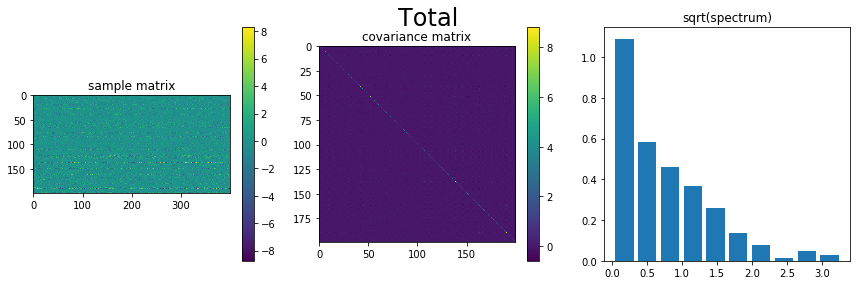

In [4]:
viz.plot_cov_from_vec(M,'Total')

## plot original signal

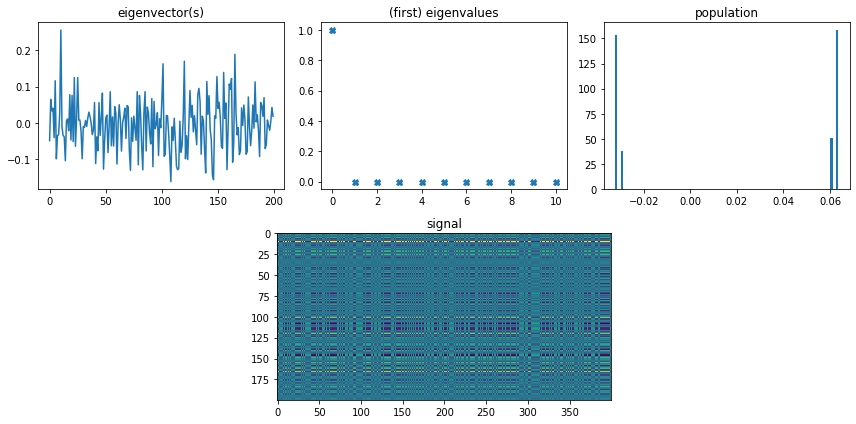

In [5]:
viz.plot_signal_gen_vec(U,L,V,S,tol=1e-10)

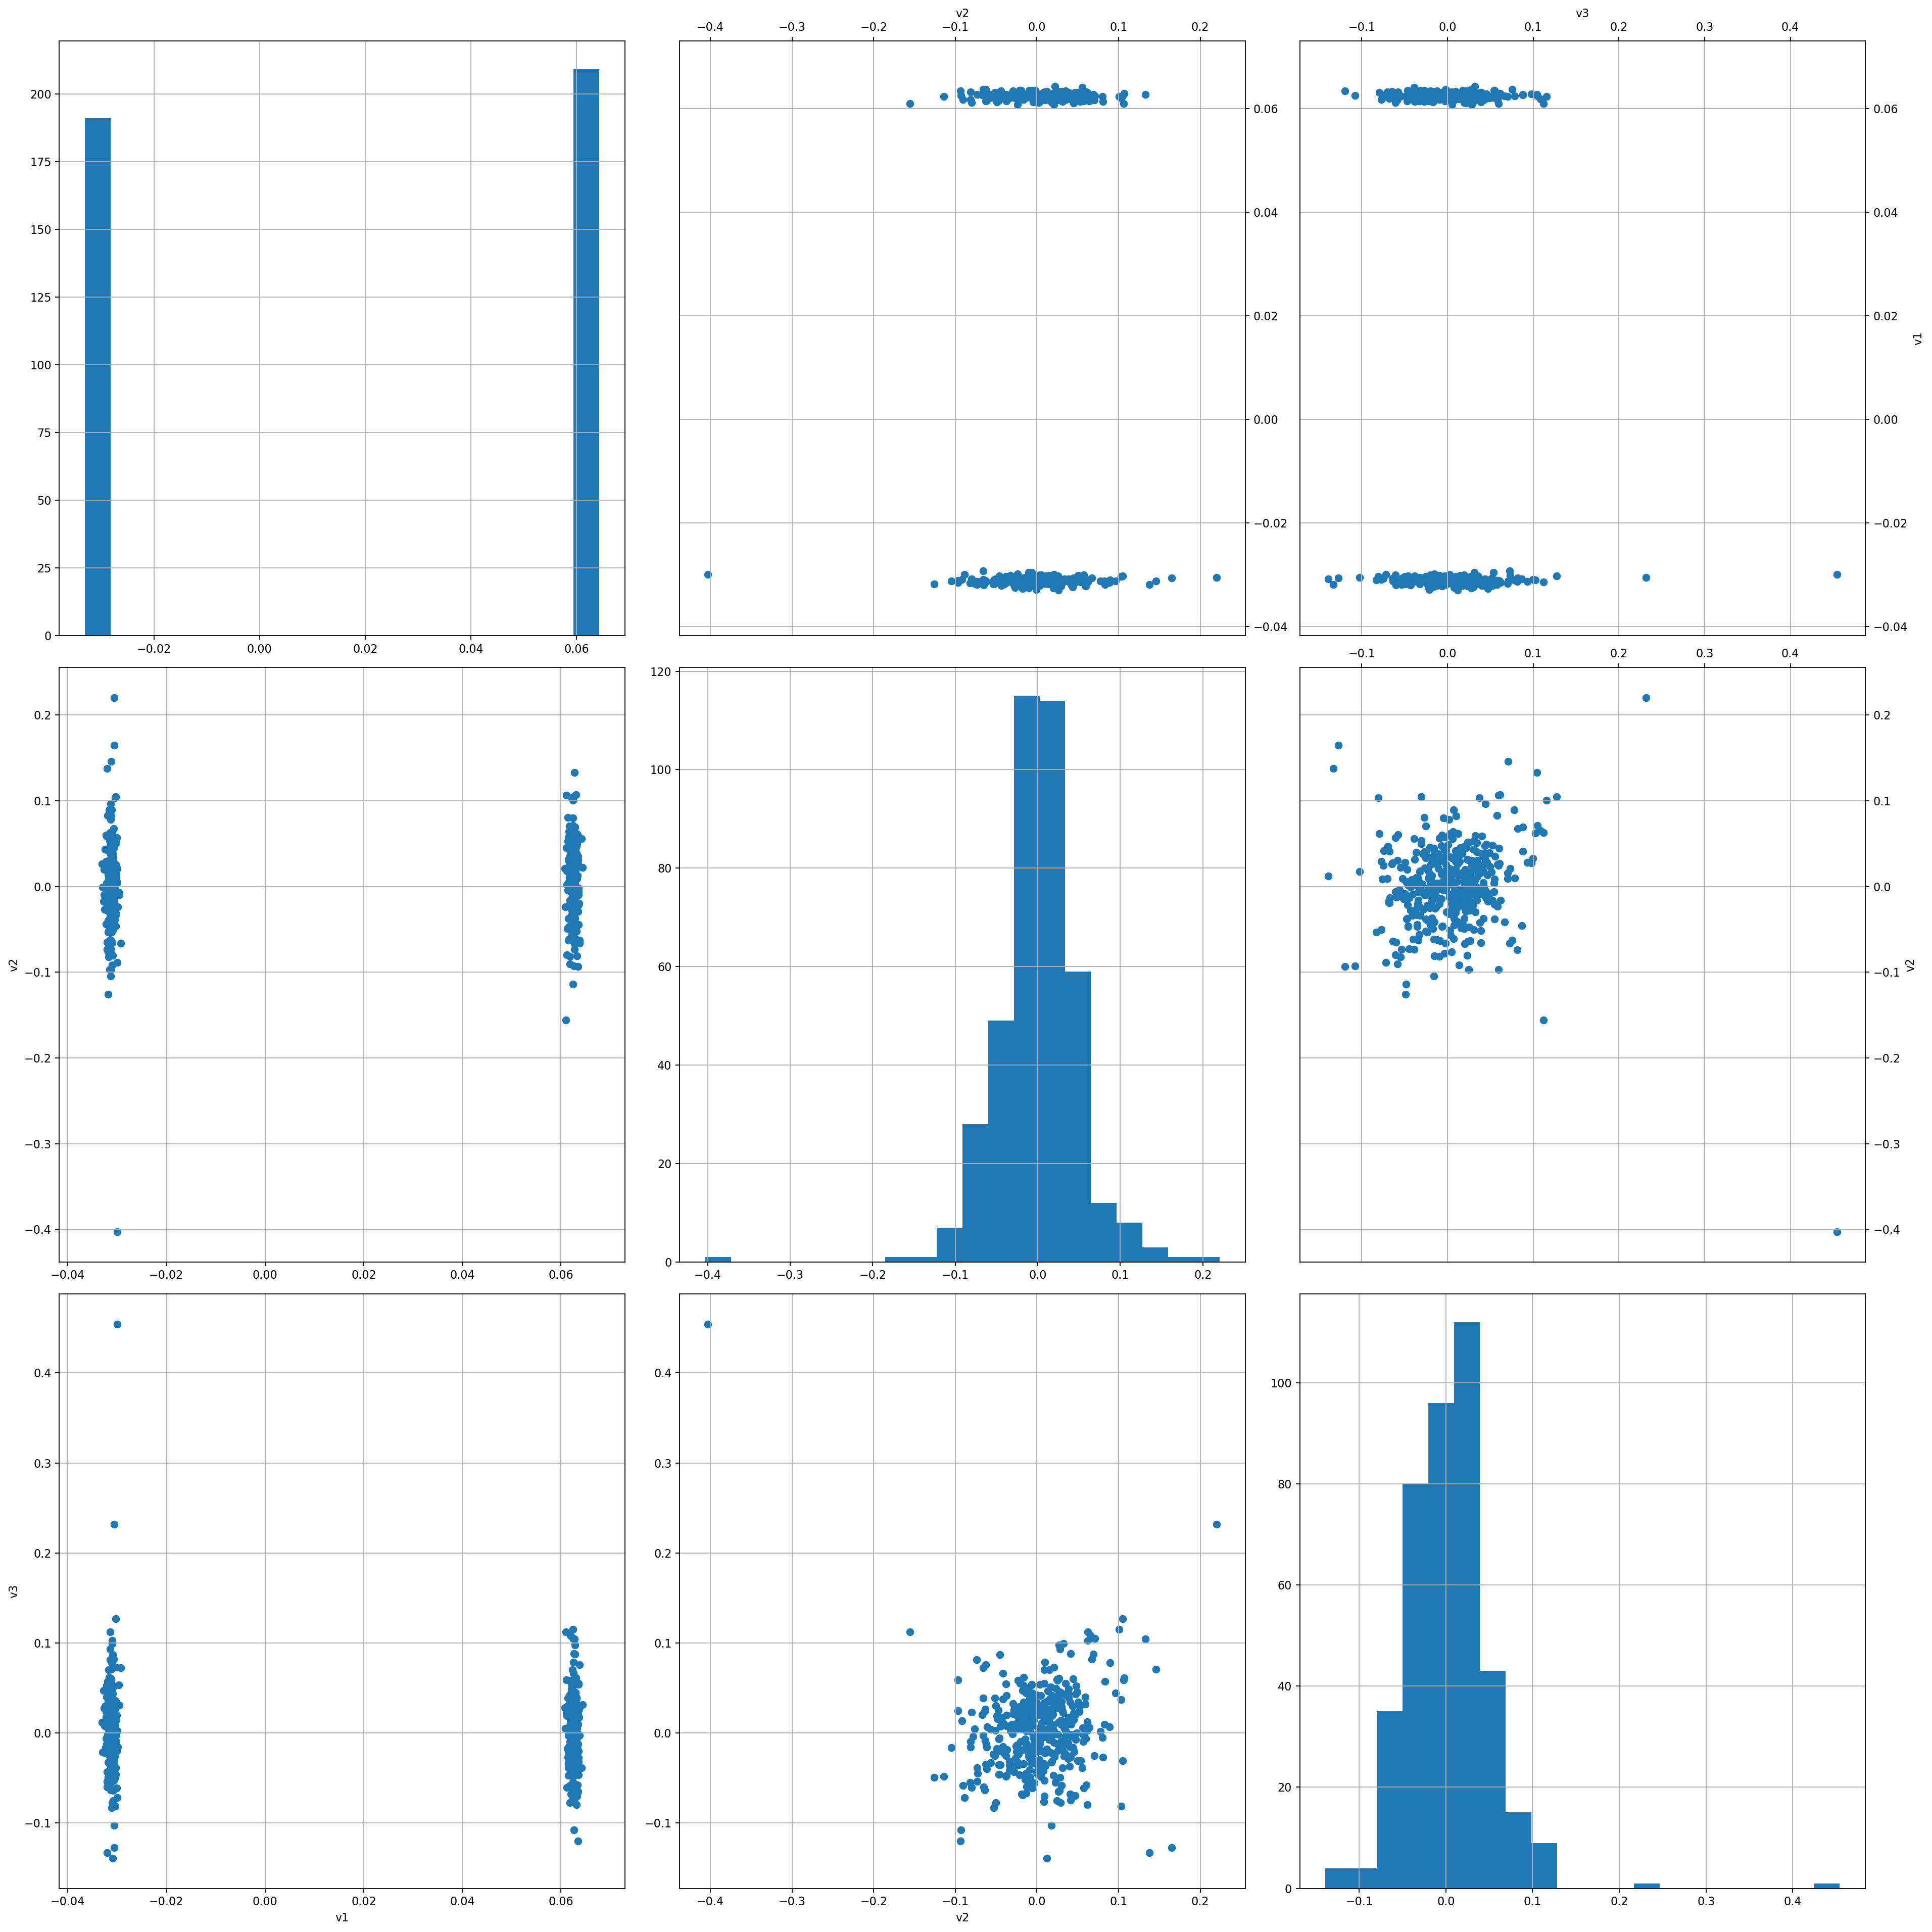

In [6]:
viz.biplots(3, V, 'scatter', 20)

## plot reconstructed signal after truncating measurement spectrum

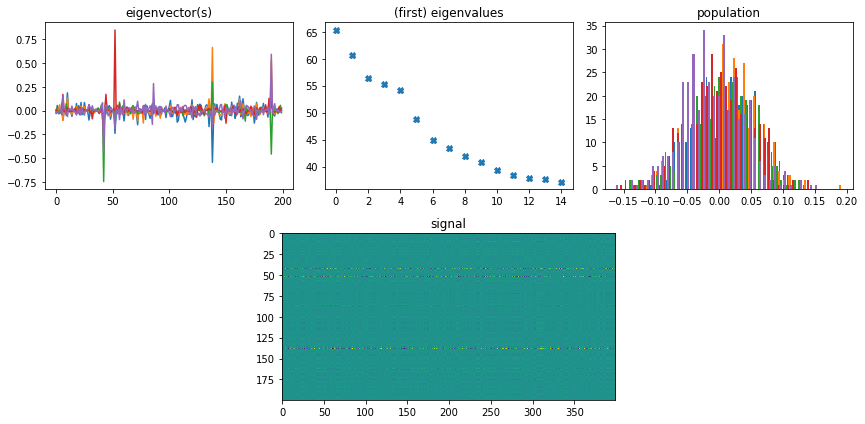

In [7]:
viz.plot_signal_gen_vec(Usvd,np.diag(Lsvd),Vsvd,np.zeros(S.shape),tol=np.sqrt(n)*2.5)

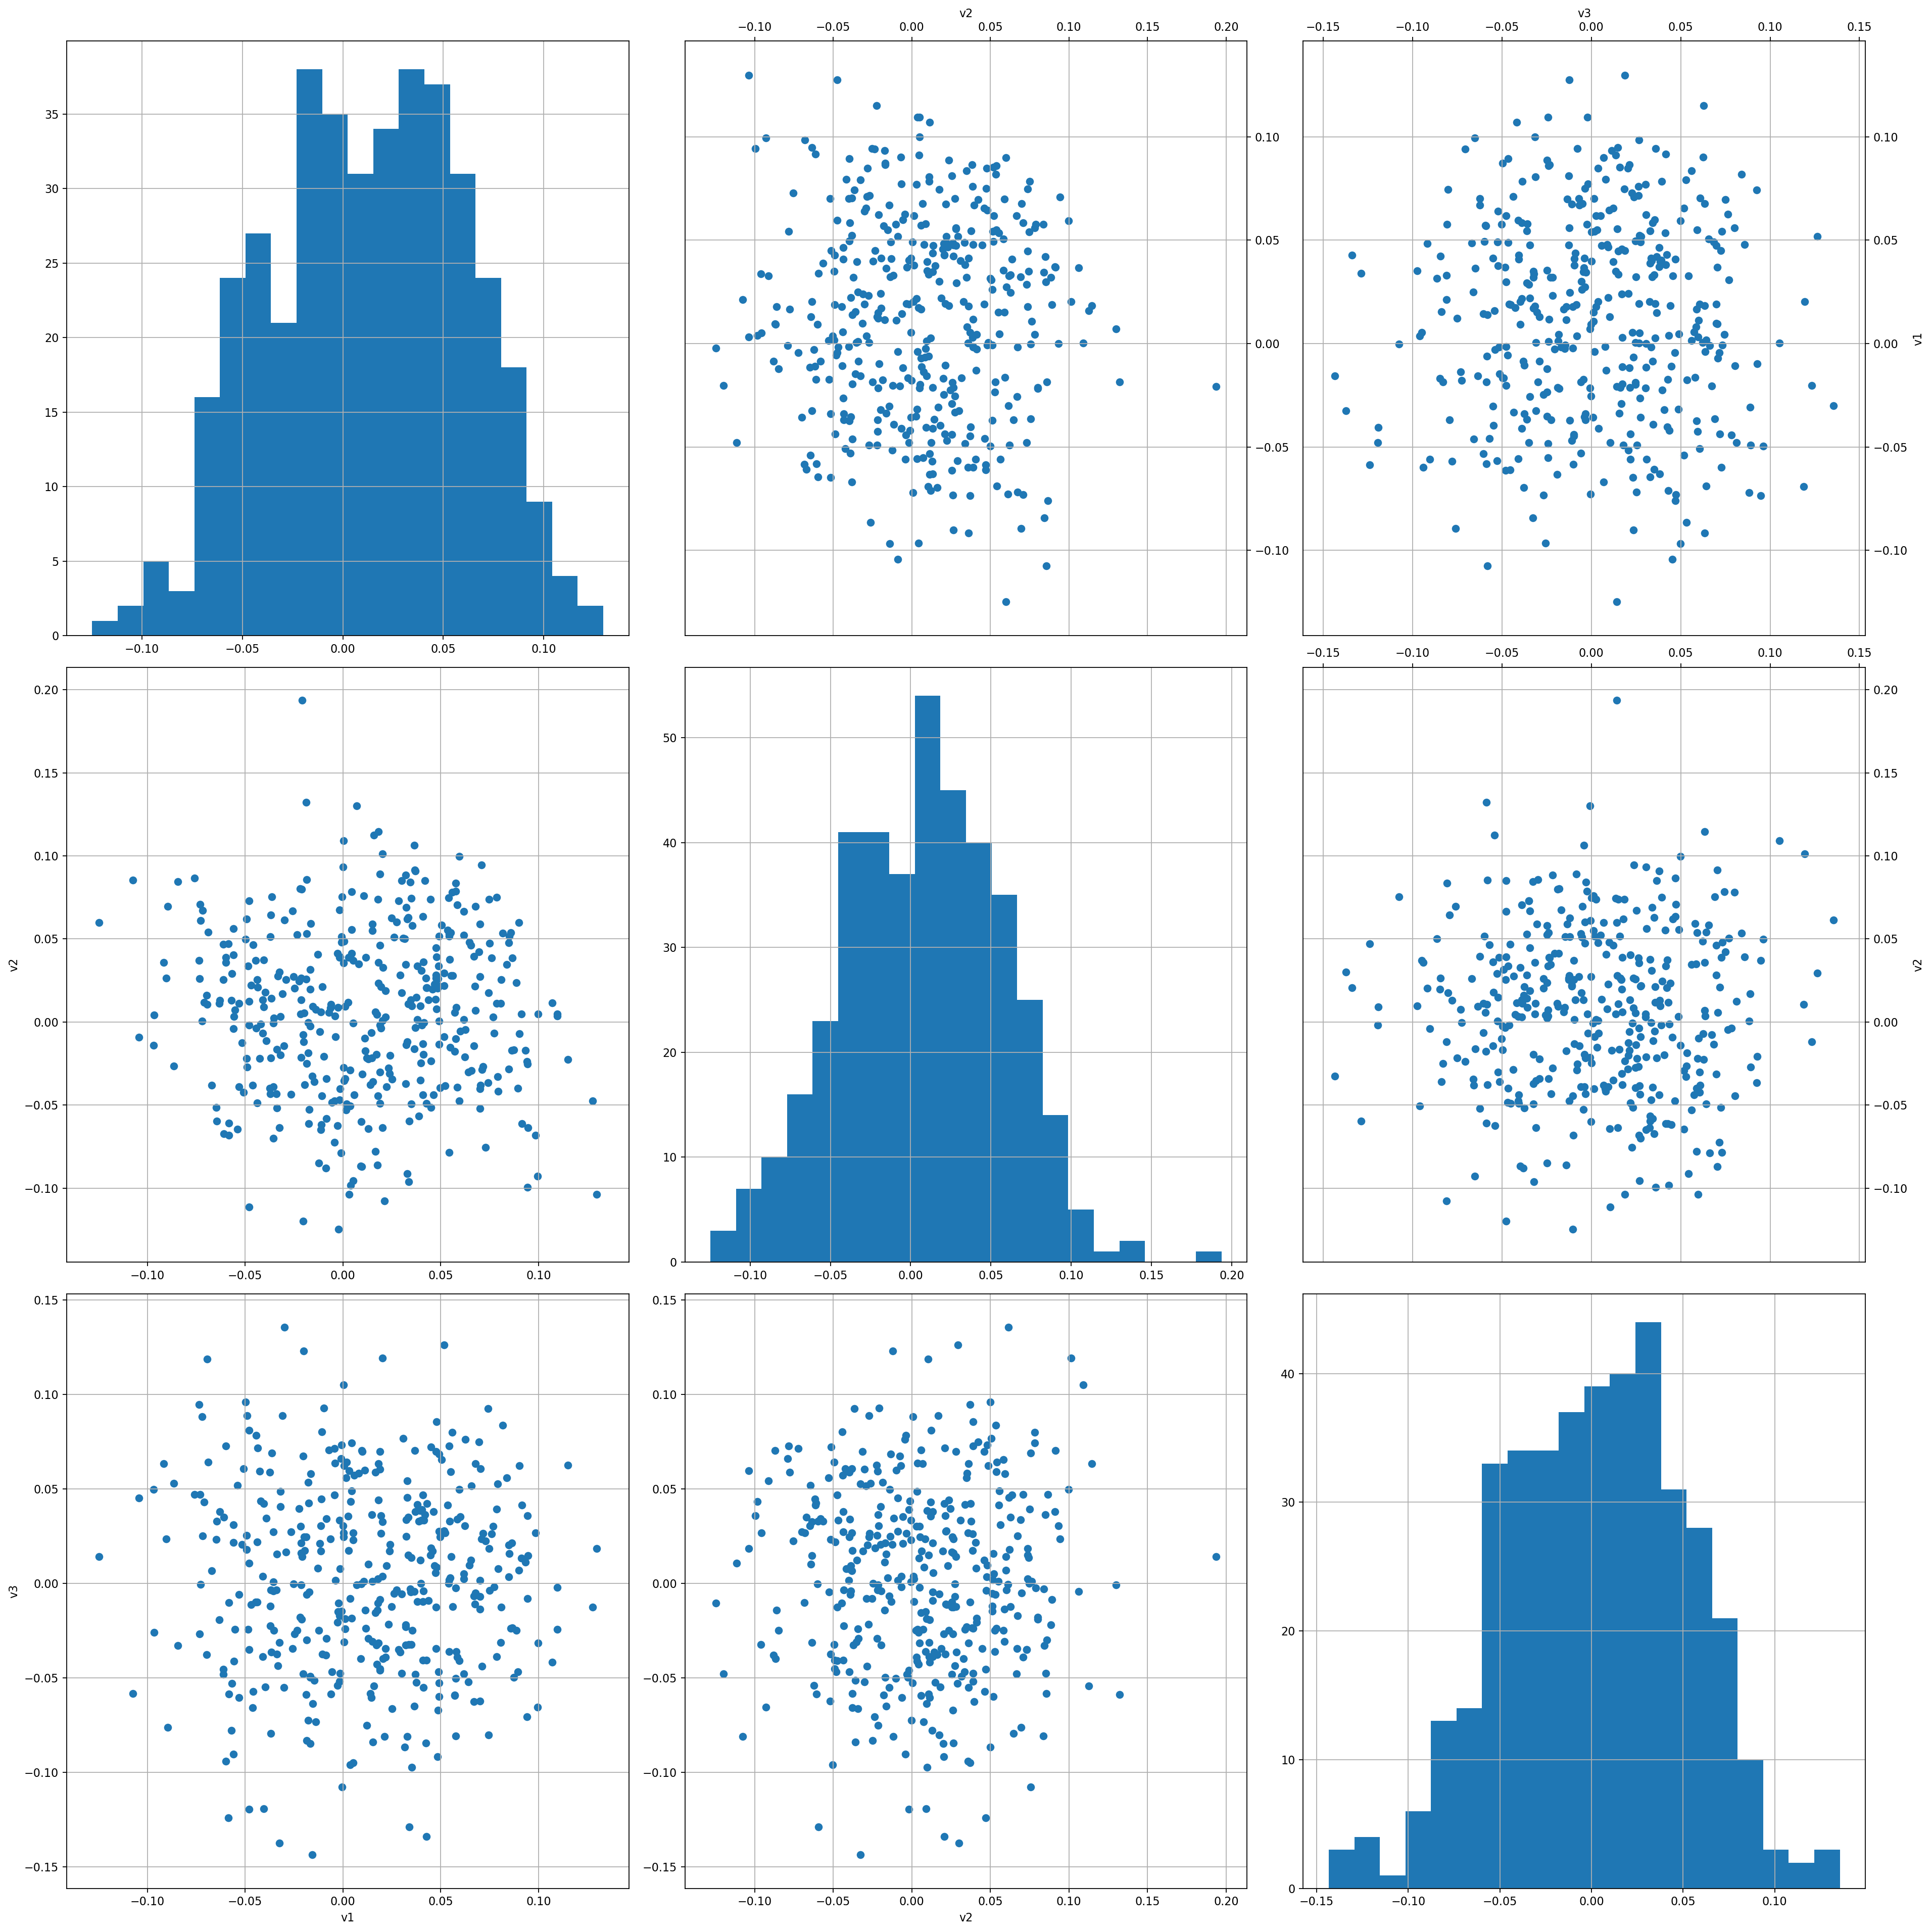

In [8]:
viz.biplots(3, Vsvd, 'scatter', 20)

## plot alignment of eigenvectors with the signal

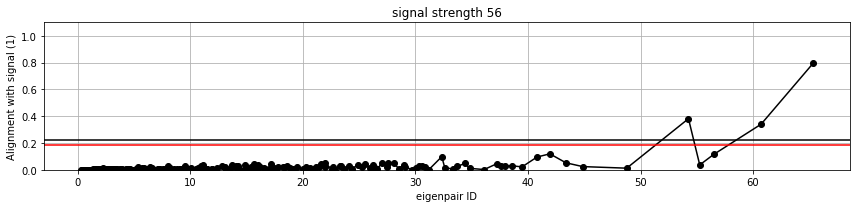

In [9]:
# Now plot alignment of eigenvectors with the signal
tol=1e-10
viz.plot_alignment(U,Lsvd,Usvd,tol,s,False)